In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# A044450 : (주)케이에스에스해운 - 12/15 삭제
# A000080 : 하이트진로(주)
# A014130 : (주)한익스프레스
# A084680 : (주)이월드
# A012280 : 영화금속(주)
# A000520 : 삼일제약(주)
# A003070 : 코오롱글로벌
# stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/Coding/LSTM/분단위/minuteData_20days/A000080_hite.csv', header=0)
# stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/Coding/LSTM/분단위/minuteData_20days/A000520_samil.csv', header=0)
# stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/Coding/LSTM/분단위/minuteData_20days/A012280_yeongwha.csv', header=0)
# stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/Coding/LSTM/분단위/minuteData_20days/A014130_hanEx.csv', header=0)
# stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/Coding/LSTM/분단위/minuteData_20days/A084680_eworld.csv', header=0)
stocks =  pd.read_csv('/content/drive/MyDrive/Last_Final_Ubion/step4 Prediction/LSTM/분단위/minuteData_20days/A003070_kolon.csv', header=0)
stocks

,day,time,open,high,low,close,vol,amount
0,20191210,901,9600,9600,9600,9600,715,6860000
1,20191210,909,9570,9570,9570,9570,17,160000
2,20191210,910,9540,9540,9540,9540,10,100000
3,20191210,911,9550,9550,9530,9530,61,580000
4,20191210,912,9530,9530,9530,9530,50,470000
...,...,...,...,...,...,...,...,...
2660,20191230,1515,9710,9720,9710,9710,70,680000
2661,20191230,1516,9720,9720,9710,9710,11,110000
2662,20191230,1517,9710,9710,9690,9690,63,610000
2663,20191230,1520,9690,9730,9690,9730,80,780000


### (2) 데이터 전처리 및 시각화

시각화를 위해 일자를 날짜형으로 변환한다.[링크 텍스트](https://)

In [14]:
stocks['day'] = pd.to_datetime(stocks['day'], format='%Y%m%d')
# stocks['일자'] = pd.to_datetime(stocks['일자'], format='%Y-%m-%d')
stocks['연도'] = stocks['day'].dt.year

In [15]:
stocks

,day,time,open,high,low,close,vol,amount,연도
0,2019-12-10,901,9600,9600,9600,9600,715,6860000,2019
1,2019-12-10,909,9570,9570,9570,9570,17,160000,2019
2,2019-12-10,910,9540,9540,9540,9540,10,100000,2019
3,2019-12-10,911,9550,9550,9530,9530,61,580000,2019
4,2019-12-10,912,9530,9530,9530,9530,50,470000,2019
...,...,...,...,...,...,...,...,...,...
2660,2019-12-30,1515,9710,9720,9710,9710,70,680000,2019
2661,2019-12-30,1516,9720,9720,9710,9710,11,110000,2019
2662,2019-12-30,1517,9710,9710,9690,9690,63,610000,2019
2663,2019-12-30,1520,9690,9730,9690,9730,80,780000,2019


연도는 1990년 이후로 재분류 한다.

In [16]:
df = stocks.loc[stocks['day']>="1990"]
# df = stocks.loc[(stocks['일자']>="1990") & (df['column_name'] <= B)]
df

,day,time,open,high,low,close,vol,amount,연도
0,2019-12-10,901,9600,9600,9600,9600,715,6860000,2019
1,2019-12-10,909,9570,9570,9570,9570,17,160000,2019
2,2019-12-10,910,9540,9540,9540,9540,10,100000,2019
3,2019-12-10,911,9550,9550,9530,9530,61,580000,2019
4,2019-12-10,912,9530,9530,9530,9530,50,470000,2019
...,...,...,...,...,...,...,...,...,...
2660,2019-12-30,1515,9710,9720,9710,9710,70,680000,2019
2661,2019-12-30,1516,9720,9720,9710,9710,11,110000,2019
2662,2019-12-30,1517,9710,9710,9690,9690,63,610000,2019
2663,2019-12-30,1520,9690,9730,9690,9730,80,780000,2019


Text(0, 0.5, 'price')

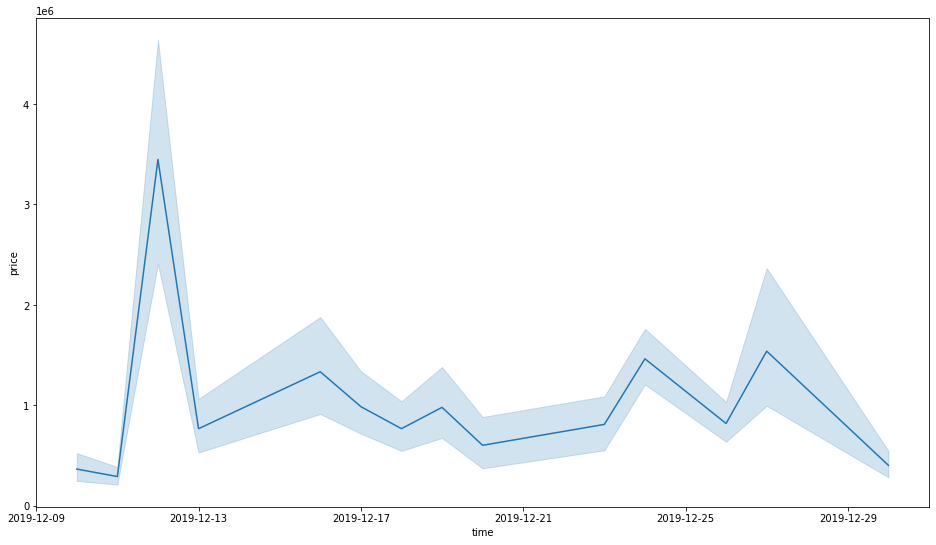

In [17]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['amount'], x=df['day'])
plt.xlabel('time')
plt.ylabel('price')

Text(0, 0.5, 'price')

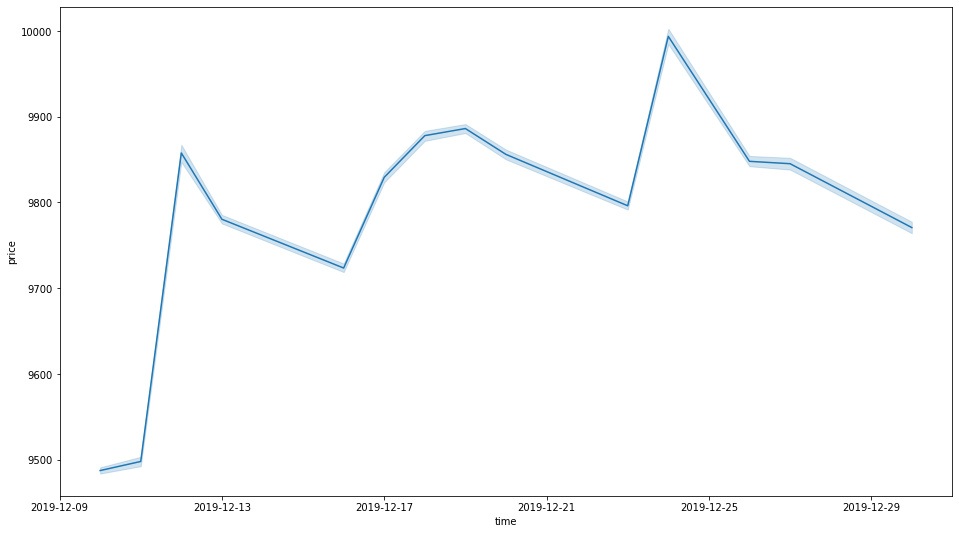

In [18]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close'], x=df['day'])
plt.xlabel('time')
plt.ylabel('price')

In [19]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()				
scale_cols = ['open', 'high', 'low', 'close', 'amount']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,open,high,low,close,amount
0,0.276316,0.276316,0.295775,0.276316,0.110520
1,0.236842,0.236842,0.253521,0.236842,0.002578
2,0.197368,0.197368,0.211268,0.197368,0.001611
3,0.210526,0.210526,0.197183,0.184211,0.009344
4,0.184211,0.184211,0.197183,0.184211,0.007572
...,...,...,...,...,...
2660,0.421053,0.434211,0.450704,0.421053,0.010955
2661,0.434211,0.434211,0.450704,0.421053,0.001772
2662,0.421053,0.421053,0.422535,0.394737,0.009828
2663,0.394737,0.447368,0.422535,0.447368,0.012566



정규화는 왜 하는 것일까?
정규화는 무엇인가?
정규화(MinMaxScaler)를 해주면 전체 데이터는 0, 1사이의 값을 갖도록 해준다.

(4) 시계열 데이터의 데이터셋 분리

시계열 데이터의 데이터셋은 보통 window_size라고 정의한다.

window_size는 과거 기간의 주가 데이터에 기반하여 다음날의 종가를 예측할 것인가를 정하는 parameter이다.

만약 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정하면 window_size=20이 되는 것이다.

실제 100일의 과거 데이터를 기반으로 데이터셋을 분리하도록 한다.

이 때, make_dataset이라는 함수를 만든다.

feature_list & label list를 분리한다.

In [20]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [21]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [22]:
from sklearn.model_selection import train_test_split

feature_cols =['open', 'high', 'low', 'amount']
label_cols = [ 'close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1956, 20, 4), (489, 20, 4))

In [23]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 4), (200, 1))

In [24]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [26]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs= 10, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/10
120/123 [============================>.] - ETA: 0s - loss: 0.1092
Epoch 00001: val_loss improved from inf to 0.00250, saving model to model/tmp_checkpoint.h5
123/123 [==============================] - 3s 14ms/step - loss: 0.1072 - val_loss: 0.0025
Epoch 2/10
121/123 [============================>.] - ETA: 0s - loss: 0.0021
Epoch 00002: val_loss improved from 0.00250 to 0.00168, saving model to model/tmp_checkpoint.h5
123/123 [==============================] - 1s 10ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/10
122/123 [============================>.] - ETA: 0s - loss: 0.0016
Epoch 00003: val_loss improved from 0.00168 to 0.00145, saving model to model/tmp_checkpoint.h5
123/123 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/10
120/123 [============================>.] - ETA: 0s - loss: 0.0014
Epoch 00004: val_loss improved from 0.00145 to 0.00130, saving model to model/tmp_checkpoint.h5
123/123 [==============================] -

In [27]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

In [28]:
pred

array([[0.5623529 ],
       [0.5676943 ],
       [0.57489526],
       [0.58143353],
       [0.58749855],
       [0.59297514],
       [0.5981262 ],
       [0.60205054],
       [0.57595885],
       [0.5578002 ],
       [0.55763364],
       [0.5587387 ],
       [0.54674006],
       [0.5380027 ],
       [0.53330743],
       [0.54193294],
       [0.546317  ],
       [0.5520438 ],
       [0.55112696],
       [0.55346036],
       [0.55419564],
       [0.56093204],
       [0.5665219 ],
       [0.5645176 ],
       [0.56697667],
       [0.57122064],
       [0.57431984],
       [0.5768502 ],
       [0.57805026],
       [0.57875943],
       [0.5797775 ],
       [0.5809436 ],
       [0.5809686 ],
       [0.58090425],
       [0.5810509 ],
       [0.58129585],
       [0.5812746 ],
       [0.58434284],
       [0.58346426],
       [0.58610535],
       [0.5848185 ],
       [0.5879978 ],
       [0.58939767],
       [0.58765984],
       [0.58917904],
       [0.5871823 ],
       [0.5862485 ],
       [0.581

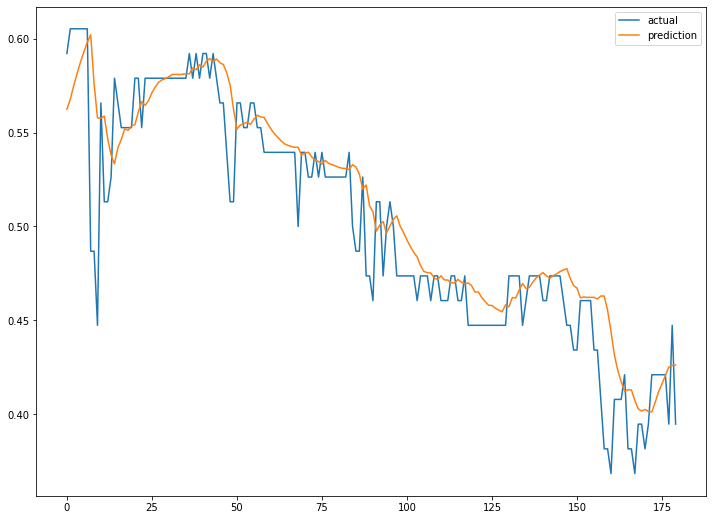

In [29]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()